## 1. <a name="1">Read the dataset</a>


First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read the data

data_path = r"C:\Users\mogeb\Downloads\countries of the world.csv"  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>


in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find**

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
#calculate the percentage of missing values (NaNs) in each column and round it to 2 decimal places.
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [7]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## 3. <a name="3">Data preprocessing</a>



### Define below all the issues that you had found in the previous part
1-Missing values in several columns<br>
2-Some numerical columns use commas as decimal separators<br>
3-Some categorical columns have extra whitespace<br>

In [ ]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [8]:
#solution
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# For categorical columns, fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [10]:
#test
print("Missing values after imputation:\n")
print(df.isnull().sum())

Missing values after imputation:

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


**Second issue**

In [11]:
#solution
cols_to_clean = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 
                'Net migration', 'Infant mortality (per 1000 births)', 
                'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 
                'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate']

for col in cols_to_clean:
    if col in df.columns:
        df[col] = df[col].str.replace(',', '.').astype(float)

In [12]:
#test
print("Sample of cleaned data:")
print(df[cols_to_clean].head())

Sample of cleaned data:
   Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
0                        48.0                          0.00          23.06   
1                       124.6                          1.26          -4.93   
2                        13.8                          0.04          -0.39   
3                       290.4                         58.29         -20.71   
4                       152.1                          0.00           6.60   

   Infant mortality (per 1000 births)  Literacy (%)  Phones (per 1000)  \
0                              163.07          36.0                3.2   
1                               21.52          86.5               71.2   
2                               31.00          70.0               78.1   
3                                9.27          97.0              259.5   
4                                4.05         100.0              497.2   

   Arable (%)  Crops (%)  Other (%)  Birthrate  Deathrate  
0 

**third issue**

In [13]:
#solution
df['Country'] = df['Country'].str.strip()
df['Region'] = df['Region'].str.strip()

In [15]:
#test
print("ample of cleaned categorical data:")
print(df[['Country', 'Region']].head())

ample of cleaned categorical data:
          Country                Region
0     Afghanistan  ASIA (EX. NEAR EAST)
1         Albania        EASTERN EUROPE
2         Algeria       NORTHERN AFRICA
3  American Samoa               OCEANIA
4         Andorra        WESTERN EUROPE


## 4. <a name="4">Features transformation</a>


*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [16]:
from sklearn import preprocessing

In [18]:
features = ['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 
            'GDP ($ per capita)', 'Literacy (%)']


scaler = preprocessing.StandardScaler()
X = df[features]
X_scaled = scaler.fit_transform(X)

In [19]:
print("Scaled features sample:")
print(X_scaled[:5])

Scaled features sample:
[[ 0.01969468  0.02758332 -0.19984434 -0.89639423 -2.48331723]
 [-0.21387688 -0.31879748 -0.15360296 -0.51671798  0.12283363]
 [ 0.03561811  0.99842051 -0.22048996 -0.36684578 -0.72868101]
 [-0.24383369 -0.33477937 -0.05351391 -0.16701618  0.66470658]
 [-0.24371972 -0.33462878 -0.13700194  0.93204665  0.81952742]]


## 5. <a name="5">Training and hyperparamter tuning</a>



Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria :

The linkage criterion determines the distance between two clusters

    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - word Linkage Clustering

2- Distance function:

    - Euclidean Distance
    - Manhattan Distance
    - Mahalanobis distance

3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

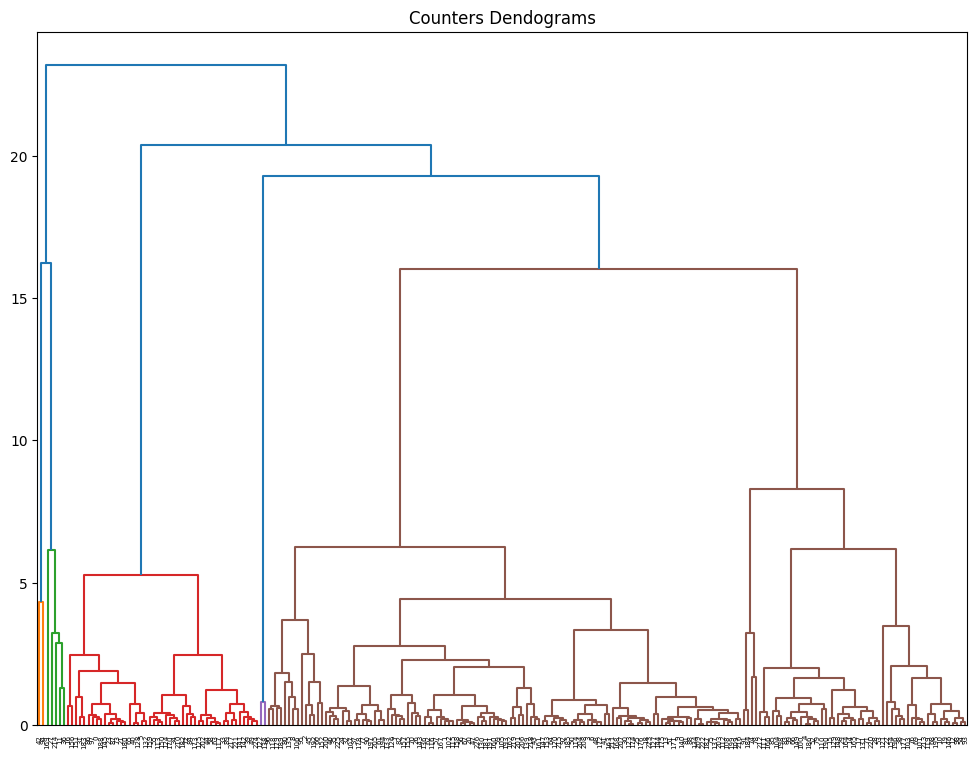

In [67]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12, 9))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=X_scaled , method= 'ward', metric='euclidean')) #fill y with your dataframe
                                                                                      #and method with linkage criteria
plt.show()                                                                                     #and metric with distance function

In [68]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.2f}")


For n_clusters = 2, the silhouette score is 0.73
For n_clusters = 3, the silhouette score is 0.41
For n_clusters = 4, the silhouette score is 0.44
For n_clusters = 5, the silhouette score is 0.45
For n_clusters = 6, the silhouette score is 0.47
For n_clusters = 7, the silhouette score is 0.48
For n_clusters = 8, the silhouette score is 0.47
For n_clusters = 9, the silhouette score is 0.43


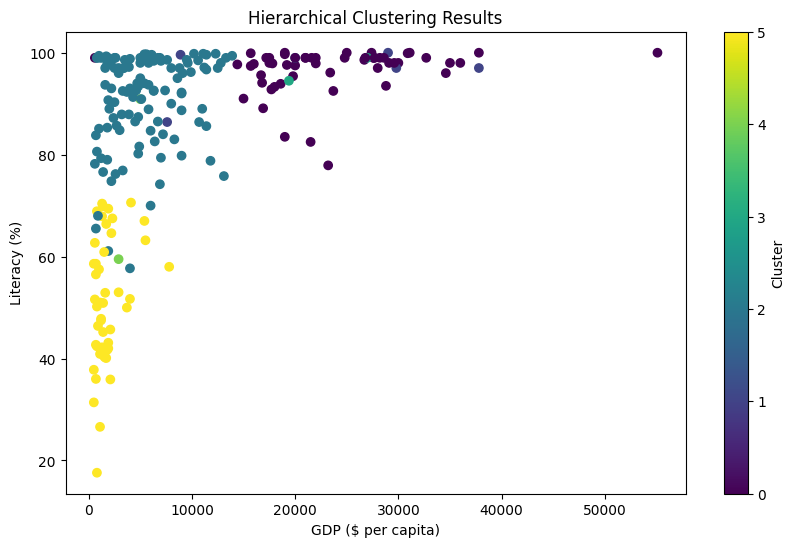


Cluster characteristics:
           Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
Cluster                                                             
0        1.172518e+07    8.721685e+04                  625.501818   
1        1.365558e+08    1.057802e+07                   13.480000   
2        1.686925e+07    4.201986e+05                  118.089655   
3        2.428340e+05    1.500000e+01                16227.250000   
4        1.204663e+09    6.442275e+06                  235.050000   
5        1.765396e+07    3.506992e+05                  105.334043   

         GDP ($ per capita)  Literacy (%)  
Cluster                                    
0              23574.545455     96.692727  
1              22620.000000     96.000000  
2               5584.913793     90.945690  
3              23200.000000     96.750000  
4               3950.000000     75.200000  
5               1778.723404     51.138298  


In [69]:
optimal_clusters = 6

# Perform clustering
clusterer = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
df['Cluster'] = clusterer.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP ($ per capita)'], df['Literacy (%)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('GDP ($ per capita)')
plt.ylabel('Literacy (%)')
plt.title('Hierarchical Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

# Analyze clusters
print("\nCluster characteristics:")
print(df.groupby('Cluster')[features].mean())